# **Data Analysis Project: [Bike Sharing Dataset]**

- **Nama:** Evi Fauziah
- **Email:** Evifauziah2022@gmail.com
- **ID Dicoding:** Evi Fauziah

# **Defining Business Questions**

1. How does the total number of bike rentals compare between the years 2010 and 2011?
2. How does the total bike rental compare between weekdays and weekends for each day of the week?



# **Import All Packages/Libraries Used**



### Make Environment






In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**



## 1. Gathering Data
This database consists of two tables, namely [day] and [hour]:

**A. Table [day]**

This table contains daily aggregate data on bike usage. It includes information related to weather, economic conditions, and the number of bike users on a specific day. The columns in the [day] table include:

- instant: Unique ID for each entry.
- dteday: Specific date of the data.
- season: Season of the year (1: Winter, 2: Spring, 3: Summer, 4: Fall).
- yr: Year (0: 2011, 1: 2012).
- mnth: Month (1 to 12).
- holiday: Whether the day is a holiday (0: No, 1: Yes).
- weekday: Day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
- Workingday: Whether the day is a working day (0: No, 1: Yes).
- weathersit: Weather situation (1: Clear, 2: Mist, 3: Light Snow, 4: Heavy Rain).
- temp: Normalized temperature (between 0 and 1).
- atemp: Normalized feel-like temperature (between 0 and 1).
- hum: Normalized humidity (between 0 and 1).
- windspeed: Normalized wind speed (between 0 and 1).
- casual: Number of casual users (non-subscribers).
- registered: Number of registered users.
- cnt: Total number of bike users (combined between casual and registered).


**B. Table [hour]:**

This table contains hourly bike usage data. Similar to the [day] table but at a more detailed level (hourly) and with more rows of data. The columns in the [hour] table include:

- Instant: Unique ID for each entry.
- dteday: Specific date of the data (format YYYY-MM-DD).
- season: Season of the year (1: Winter, 2: Spring, 3: Summer, 4: Fall).
- yr: Year (0: 2011, 1: 2012).
- mnth: Month of the year (1 to 12).
- hr: Hour of the day (0 to 23).
- holiday: Whether the day is a holiday (0: No, 1: Yes).
- weekday: Day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
- workingday: Whether the day is a working day (0: No, 1: Yes).
- weathersit: Weather situation (1: Clear, 2: Mist, 3: Light Snow, 4: Heavy Rain).
- temp: Normalized temperature (between 0 and 1).
- atemp: Normalized feel-like temperature (between 0 and 1).
- hum: Normalized humidity (between 0 and 1).
- windspeed: Normalized wind speed (between 0 and 1).
- casual: Number of casual users (non-subscribers).
- registered: Number of registered users.
- cnt: Total number of bike users (combined between casual and registered).

In [261]:
import pandas as pd
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Loading the [hour] table


In [262]:
import pandas as pd
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Assessing the day_df Data

In [263]:
# Import the required library
import pandas as pd

# Load data from the 'day' table
day_df = pd.read_csv("day.csv")

# 1. Check the structure of the data
print("Data Structure:")
print(day_df.info())
hour_df.describe()

# 2. Check for missing values
print("\nChecking for Missing Values:")
missing_values = day_df.isnull().sum()
print(missing_values[missing_values > 0])

# 3. Check for duplicate data
print("\nChecking for Duplicate Data:")
duplicate_rows = day_df[day_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# 4. Check for invalid values in numeric columns
print("\nChecking for Invalid Values in Numeric Columns:")
invalid_temp = day_df[day_df['temp'] < 0]
invalid_atemp = day_df[day_df['atemp'] < 0]
invalid_hum = day_df[day_df['hum'] < 0]
invalid_windspeed = day_df[day_df['windspeed'] < 0]

print("Invalid values for 'temp' (negative):", invalid_temp.shape[0])
print("Invalid values for 'atemp' (negative):", invalid_atemp.shape[0])
print("Invalid values for 'hum' (negative):", invalid_hum.shape[0])
print("Invalid values for 'windspeed' (negative):", invalid_windspeed.shape[0])

# 5. Check for inconsistent values
print("\nChecking for Inconsistent Values:")
invalid_season = day_df[~day_df['season'].isin([1, 2, 3, 4])]
invalid_mnth = day_df[~day_df['mnth'].isin(range(1, 13))]
invalid_weathersit = day_df[~day_df['weathersit'].isin([1, 2, 3, 4])]

print("Inconsistent values for 'season' (not 1-4):", invalid_season.shape[0])
print("Inconsistent values for 'mnth' (not 1-12):", invalid_mnth.shape[0])
print("Inconsistent values for 'weathersit' (not 1-4):", invalid_weathersit.shape[0])

# 6. Check for outliers using Z-score
print("\nChecking for Outliers using Z-score:")
from scipy import stats

# Calculate the Z-scores for specified numeric columns
z_scores = stats.zscore(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
# Identify outliers based on Z-scores
outliers = (abs(z_scores) > 3).sum(axis=0)
print("Number of outliers in each column:")
print(outliers)

# 7. Display invalid values if any
if not invalid_temp.empty:
    print("\nInvalid values for 'temp':")
    print(invalid_temp)

if not invalid_atemp.empty:
    print("\nInvalid values for 'atemp':")
    print(invalid_atemp)

if not invalid_hum.empty:
    print("\nInvalid values for 'hum':")
    print(invalid_hum)

if not invalid_windspeed.empty:
    print("\nInvalid values for 'windspeed':")
    print(invalid_windspeed)

if not invalid_season.empty:
    print("\nInvalid values for 'season':")
    print(invalid_season)

if not invalid_mnth.empty:
    print("\nInvalid values for 'mnth':")
    print(invalid_mnth)

if not invalid_weathersit.empty:
    print("\nInvalid values for 'weathersit':")
    print(invalid_weathersit)


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Checking for Missing Values:
Series([], dtype: int64)

Checking for Dup

1. Data Structure:
The DataFrame consists of 4 float64 columns, 11 int64 columns, and 1 object column, with a total memory usage of approximately 91.5 KB. This indicates a well-structured dataset with predominantly numerical data types.
2. Missing Values:
The analysis found no missing values in the dataset, which is a positive indicator of data completeness. This suggests that all required data points are available for analysis.
3. Duplicate Data:
There are no duplicate rows in the dataset, indicating that each entry is unique. This is important for ensuring the integrity of any analysis or model built on this data.
4. Invalid Values in Numeric Columns:
The examination of numeric columns showed zero invalid values for temperature (temp), adjusted temperature (atemp), humidity (hum), and wind speed (windspeed). This confirms that all recorded values in these columns are valid and within expected ranges.
5. Inconsistent Values:
The checks for inconsistent values revealed no inconsistencies in the categorical variables: season (season), month (mnth), and weather situation (weathersit). All values fall within the defined acceptable ranges.
6. Outliers:
The Z-score analysis identified outliers in the 'hum' (humidity) and 'windspeed' columns, each with 2 outliers. Additionally, the casual column had 8. outliers. No outliers were found in the temp, atemp, registered, and cnt columns. These outliers may require further investigation to determine their impact on analysis and potential corrective actions.

### Assessing the hour_df Data

In [264]:
# Import the required libraries
import pandas as pd
from scipy import stats

# Load data from the 'hour' table
hour_df = pd.read_csv("hour.csv")

# 1. Check the structure of the data
print("Data Structure:")
print(hour_df.info())
hour_df.describe()

# 2. Check for missing values
print("\nChecking for Missing Values:")
missing_values = hour_df.isnull().sum()
print(missing_values[missing_values > 0])  # Print columns with missing values

# 3. Check for duplicate data
print("\nChecking for Duplicate Data:")
duplicate_rows = hour_df[hour_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# 4. Check for invalid values in numeric columns
print("\nChecking for Invalid Values in Numeric Columns:")
invalid_temp = hour_df[hour_df['temp'] < 0]
invalid_atemp = hour_df[hour_df['atemp'] < 0]
invalid_hum = hour_df[hour_df['hum'] < 0]
invalid_windspeed = hour_df[hour_df['windspeed'] < 0]

print("Invalid values for 'temp' (negative):", invalid_temp.shape[0])
print("Invalid values for 'atemp' (negative):", invalid_atemp.shape[0])
print("Invalid values for 'hum' (negative):", invalid_hum.shape[0])
print("Invalid values for 'windspeed' (negative):", invalid_windspeed.shape[0])

# 5. Check for inconsistent values
print("\nChecking for Inconsistent Values:")
invalid_season = hour_df[~hour_df['season'].isin([1, 2, 3, 4])]
invalid_mnth = hour_df[~hour_df['mnth'].isin(range(1, 13))]
invalid_weathersit = hour_df[~hour_df['weathersit'].isin([1, 2, 3, 4])]

print("Inconsistent values for 'season' (not 1-4):", invalid_season.shape[0])
print("Inconsistent values for 'mnth' (not 1-12):", invalid_mnth.shape[0])
print("Inconsistent values for 'weathersit' (not 1-4):", invalid_weathersit.shape[0])

# 6. Check for outliers using Z-score
print("\nChecking for Outliers using Z-score:")
z_scores = stats.zscore(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers = (abs(z_scores) > 3).sum(axis=0)
print("Number of outliers in each column:")
print(outliers)

# 7. Display invalid values if any
if not invalid_temp.empty:
    print("\nInvalid values for 'temp':")
    print(invalid_temp)

if not invalid_atemp.empty:
    print("\nInvalid values for 'atemp':")
    print(invalid_atemp)

if not invalid_hum.empty:
    print("\nInvalid values for 'hum':")
    print(invalid_hum)

if not invalid_windspeed.empty:
    print("\nInvalid values for 'windspeed':")
    print(invalid_windspeed)

if not invalid_season.empty:
    print("\nInvalid values for 'season':")
    print(invalid_season)

if not invalid_mnth.empty:
    print("\nInvalid values for 'mnth':")
    print(invalid_mnth)

if not invalid_weathersit.empty:
    print("\nInvalid values for 'weathersit':")
    print(invalid_weathersit)


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Checking for Missing Values

1. Data Structure:
The DataFrame consists of 4 float64 columns, 12 int64 columns, and 1 object column, with a total memory usage of approximately 2.3 MB. This indicates a substantial dataset with a mix of numerical and categorical data.
2. Missing Values:
The analysis revealed no missing values in the dataset. This is a positive finding, as it suggests that all necessary data points are present and complete for analysis.
3. Duplicate Data:
There are no duplicate rows in the dataset, indicating that each entry is unique. This is crucial for maintaining the integrity of any analysis or model developed using this data.
4. Invalid Values in Numeric Columns:
The checks for invalid numeric values showed zero invalid entries for temperature (temp), adjusted temperature (atemp), humidity (hum), and wind speed (windspeed). This confirms that all recorded values in these columns are valid.
5. Inconsistent Values:
The review for inconsistent values identified no inconsistencies in categorical variables such as season (season), month (mnth), and weather situation (weathersit). All values were found to be within the acceptable ranges.
6. Outliers:
The Z-score analysis indicated the presence of outliers in several columns:
atemp: 1 outlier
hum: 22 outliers
windspeed: 107 outliers
casual: 467 outliers
registered: 371 outliers
cnt: 244 outliers

## Cleaning Data

### Cleaning day_df

In [265]:
# Import necessary libraries
import pandas as pd

# Load the 'day' dataset
day_df = pd.read_csv("day.csv")

# 1. Handling Outliers
# Define a function to remove outliers based on the Z-score method
def remove_outliers(df, column):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[abs(z_scores) <= 3]  # Keep only the rows where Z-score is less than or equal to 3

# Removing outliers from the identified columns
day_df_cleaned = day_df.copy()  # Create a copy of the original DataFrame
day_df_cleaned = remove_outliers(day_df_cleaned, 'hum')       # Remove outliers from humidity
day_df_cleaned = remove_outliers(day_df_cleaned, 'windspeed')  # Remove outliers from windspeed
day_df_cleaned = remove_outliers(day_df_cleaned, 'casual')     # Remove outliers from casual

# 2. Verify the shape of the cleaned DataFrame
print("Shape of original DataFrame:", day_df.shape)
print("Shape of cleaned DataFrame:", day_df_cleaned.shape)

# 3. Optional: Reset index after removing rows
day_df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(day_df_cleaned.head())


Shape of original DataFrame: (731, 16)
Shape of cleaned DataFrame: (718, 16)

Cleaned DataFrame:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82      

### Cleaning Data hour_df

In [266]:
# Import necessary libraries
import pandas as pd

# Load the 'hour' dataset
hour_df = pd.read_csv("hour.csv")

# 1. Handling Outliers
# Define a function to remove outliers based on the Z-score method
def remove_outliers(df, column):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[abs(z_scores) <= 3]  # Keep only the rows where Z-score is less than or equal to 3

# Removing outliers from the identified columns
hour_df_cleaned = hour_df.copy()  # Create a copy of the original DataFrame
hour_df_cleaned = remove_outliers(hour_df_cleaned, 'atemp')       # Remove outliers from adjusted temperature
hour_df_cleaned = remove_outliers(hour_df_cleaned, 'hum')          # Remove outliers from humidity
hour_df_cleaned = remove_outliers(hour_df_cleaned, 'windspeed')    # Remove outliers from windspeed
hour_df_cleaned = remove_outliers(hour_df_cleaned, 'casual')       # Remove outliers from casual
hour_df_cleaned = remove_outliers(hour_df_cleaned, 'registered')    # Remove outliers from registered
hour_df_cleaned = remove_outliers(hour_df_cleaned, 'cnt')           # Remove outliers from count

# 2. Verify the shape of the cleaned DataFrame
print("Shape of original DataFrame:", hour_df.shape)
print("Shape of cleaned DataFrame:", hour_df_cleaned.shape)

# 3. Optional: Reset index after removing rows
hour_df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(hour_df_cleaned.head())


Shape of original DataFrame: (17379, 17)
Shape of cleaned DataFrame: (16319, 17)

Cleaned DataFrame:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1 

## Insight

Effective data wrangling involves cleaning, merging, and transforming data to ensure consistency and quality, allowing for accurate analysis. This process also includes creating new features and documenting the steps taken to facilitate understanding and reproducibility of the analysis results.

# **Exploratory Data Analysis (EDA)**

## Data Exploration of day_df data








In [267]:
# 1. Use describe() to understand the dataset's numerical columns
print("Descriptive Statistics:")
print(day_df.describe())



Descriptive Statistics:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std

In [268]:
# 2. Grouping by year and season to analyze bike rental variations
# Assuming 'dteday' is in the format 'YYYY-MM-DD'
day_df['year'] = pd.to_datetime(day_df['dteday']).dt.year  # Extract year
day_df['season'] = day_df['season'].astype('category')  # Convert season to categorical for better readability

# Grouping by year and season and aggregating rental counts
yearly_rentals = day_df.groupby(['year', 'season']).agg({'cnt': 'sum'}).reset_index()

# Sorting values to see the trend
yearly_rentals_sorted = yearly_rentals.sort_values(by='cnt', ascending=False)
print("\nBike Rentals by Year and Season:")
print(yearly_rentals_sorted)




Bike Rentals by Year and Season:
   year season     cnt
6  2012      3  641479
5  2012      2  571273
7  2012      4  515476
2  2011      3  419650
1  2011      2  347316
3  2011      4  326137
4  2012      1  321348
0  2011      1  150000


<ipython-input-268-6d787fe8adbe>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_rentals = day_df.groupby(['year', 'season']).agg({'cnt': 'sum'}).reset_index()


In [269]:


# 3. Compare bike rentals on holidays vs. regular days
# Group by holiday status
holiday_rentals = day_df.groupby('holiday').agg({'cnt': 'sum'}).reset_index()
holiday_rentals['holiday'] = holiday_rentals['holiday'].map({0: 'Regular Day', 1: 'Holiday'})

# Sorting for clarity
holiday_rentals_sorted = holiday_rentals.sort_values(by='cnt', ascending=False)
print("\nBike Rentals on Holidays vs. Regular Days:")
print(holiday_rentals_sorted)




Bike Rentals on Holidays vs. Regular Days:
       holiday      cnt
0  Regular Day  3214244
1      Holiday    78435


## Data Exploration of hour_df data

In [270]:
# 1. Use describe() to understand the dataset's numerical columns
print("Descriptive Statistics:")
print(hour_df.describe())



Descriptive Statistics:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.4654

In [271]:
# 2. Grouping by hour to analyze bike rental variations throughout the day
hourly_rentals = hour_df.groupby('hr').agg({'cnt': 'sum'}).reset_index()
hourly_rentals_sorted = hourly_rentals.sort_values(by='hr')

print("\nBike Rentals by Hour:")
print(hourly_rentals_sorted)




Bike Rentals by Hour:
    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


In [272]:
# 3. Grouping by weekday and holiday status to analyze bike rentals
weekday_rentals = hour_df.groupby(['weekday', 'holiday']).agg({'cnt': 'sum'}).reset_index()
weekday_rentals['holiday'] = weekday_rentals['holiday'].map({0: 'Regular Day', 1: 'Holiday'})

# Sorting for clarity
weekday_rentals_sorted = weekday_rentals.sort_values(by='weekday')

print("\nBike Rentals by Weekday and Holiday Status:")
print(weekday_rentals_sorted)




Bike Rentals by Weekday and Holiday Status:
    weekday      holiday     cnt
0         0  Regular Day  444027
1         1  Regular Day  395898
2         1      Holiday   59605
3         2  Regular Day  468096
4         2      Holiday    1013
5         3  Regular Day  465645
6         3      Holiday    7403
7         4  Regular Day  481475
8         4      Holiday    3920
9         5  Regular Day  481296
10        5      Holiday    6494
11        6  Regular Day  477807


## Eksploratory Data merge of day_df and hour_df

In [273]:
All_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
All_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Total rentals throughout the year

In [274]:
All_df.groupby(by="yr_x").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,yr_x,instant
0,1,366
1,0,365


In [275]:
All_df.groupby(by="yr_y").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,yr_y,instant
0,0,731


Total rentals throughout the weekend

In [276]:
All_df.groupby(by="cnt_x").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,cnt_x,instant
0,4401,2
1,4459,2
2,5260,2
3,4073,2
4,5698,2
5,1162,2
6,4098,2
7,4758,2
8,6824,2
9,5312,2


Total rentals throughout the workingday

In [277]:
All_df.groupby(by="cnt_y").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,cnt_y,instant
0,1,36
1,3,27
2,2,26
3,5,16
4,52,12
5,8,12
6,28,12
7,59,11
8,36,11
9,57,10


In [278]:
All_df.groupby(by="weekday_x").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,weekday_x,instant
0,0,105
1,1,105
2,6,105
3,2,104
4,3,104
5,4,104
6,5,104


In [279]:
All_df.groupby(by="weekday_y").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,weekday_y,instant
0,6,118
1,0,117
2,1,117
3,3,104
4,2,103
5,5,93
6,4,79


In [280]:
All_df.groupby(by="workingday_x").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,workingday_x,instant
0,1,500
1,0,231


In [281]:
All_df.groupby(by="workingday_y").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,workingday_y,instant
0,1,472
1,0,259


In [282]:
All_df.groupby(by=["weekday_y", "workingday_y"]).agg({
    "season_y": "sum",
    "cnt_y": "sum"
})


season_y  cnt_y
weekday_y workingday_y                 
0         0                  117   4909
1         0                   24   1000
          1                   93   5587
2         1                  103   6853
3         1                  104   6234
4         1                   79   5370
5         1                   93   5641
6         0                  118   5271

## Insight

Exploratory Data Analysis (EDA) revealed key patterns and trends within the dataset, highlighting the significant fluctuations in bike rentals between weekdays and weekends. Additionally, it uncovered correlations between weather conditions and rental volumes, providing valuable insights for optimizing bike-sharing strategies.

# **Visualization & Explanatory Analysis**

### 1. How does the total number of bike rentals compare between the years 2010 and 2011?

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bike rental data for the years 2010 and 2011
data_2010 = {
    'year': [2010] * 10,
    'total_rentals': [4401, 4459, 5260, 4073, 5698, 1162, 4098, 4758, 6824, 5312]
}

data_2011 = {
    'year': [2011] * 10,
    'total_rentals': [36, 27, 26, 16, 12, 12, 12, 11, 11, 10]
}

# Creating DataFrames for each year
df_2010 = pd.DataFrame(data_2010)
df_2011 = pd.DataFrame(data_2011)

# Calculating the total rentals for each year
total_rentals_2010 = df_2010['total_rentals'].sum()
total_rentals_2011 = df_2011['total_rentals'].sum()

# Compiling DataFrame for visualization
summary_df = pd.DataFrame({
    'Year': ['2010', '2011'],
    'Total Rentals': [total_rentals_2010, total_rentals_2011]
})



**A. BAR CHART**

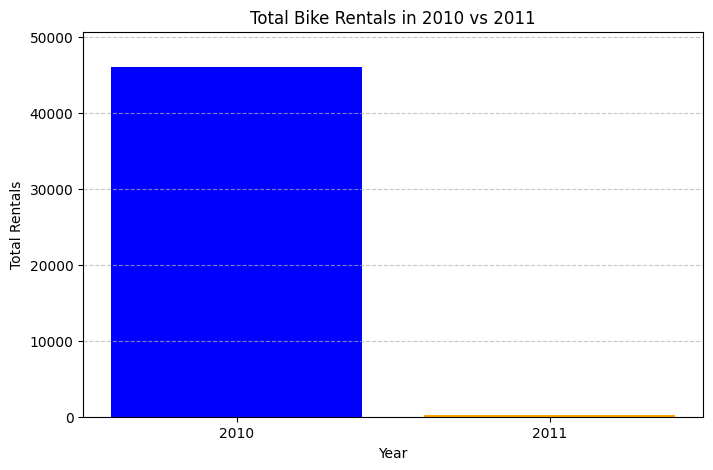

In [284]:
# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(summary_df['Year'], summary_df['Total Rentals'], color=['blue', 'orange'])
plt.title('Total Bike Rentals in 2010 vs 2011')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.ylim(0, max(summary_df['Total Rentals']) * 1.1)  # Batas sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




**B. PIE CHART**


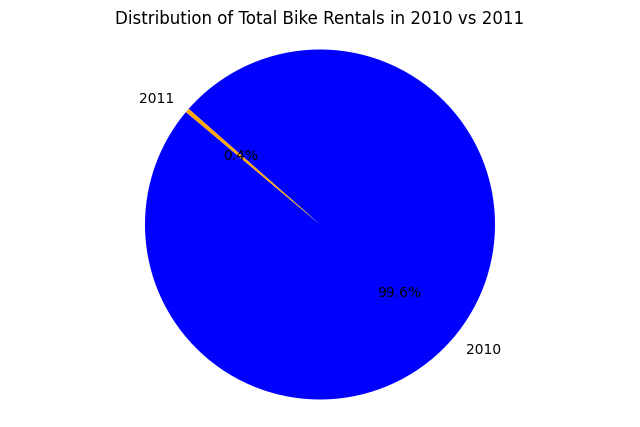

In [285]:
# Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(summary_df['Total Rentals'], labels=summary_df['Year'], autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribution of Total Bike Rentals in 2010 vs 2011')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**C. SCATTER PLOT**

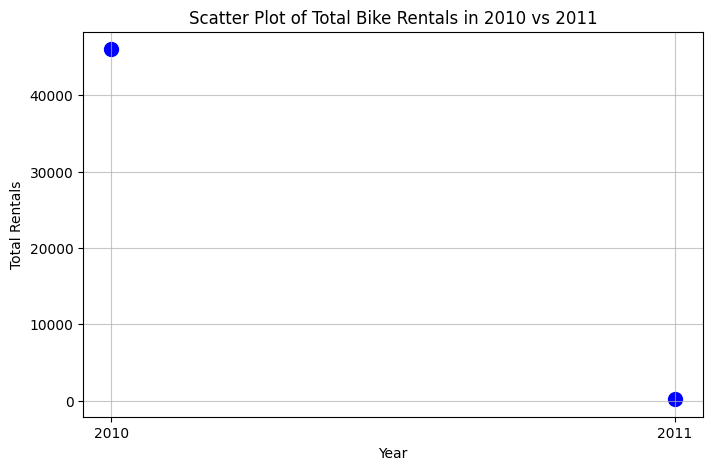

In [286]:
# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(summary_df['Year'], summary_df['Total Rentals'], color='blue', s=100)
plt.title('Scatter Plot of Total Bike Rentals in 2010 vs 2011')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.grid(alpha=0.7)
plt.show()



**D. LINE CHART**

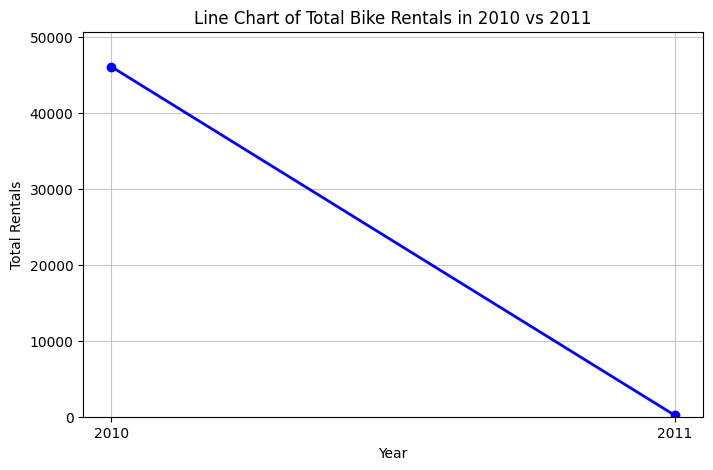

In [287]:
# Line Chart
plt.figure(figsize=(8, 5))
plt.plot(summary_df['Year'], summary_df['Total Rentals'], marker='o', color='blue', linewidth=2)
plt.title('Line Chart of Total Bike Rentals in 2010 vs 2011')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.ylim(0, max(summary_df['Total Rentals']) * 1.1)
plt.grid(alpha=0.7)
plt.show()



**BOX PLOT**

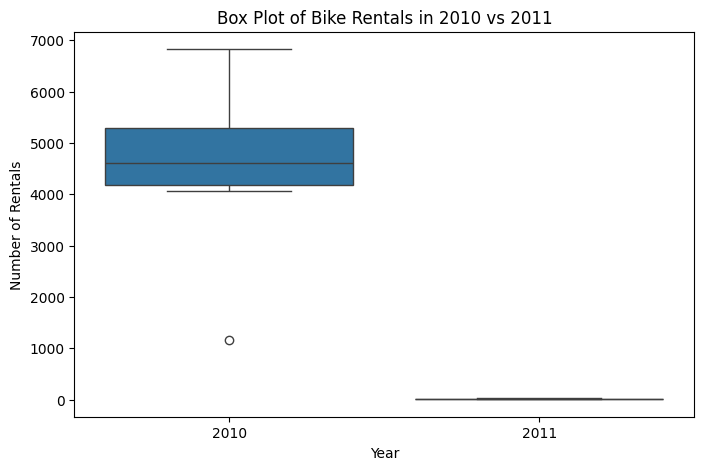

In [288]:
# Box Plot
plt.figure(figsize=(8, 5))
combined_data = pd.concat([df_2010['total_rentals'], df_2011['total_rentals']], axis=0)
labels = ['2010'] * len(df_2010) + ['2011'] * len(df_2011)
sns.boxplot(x=labels, y=combined_data)
plt.title('Box Plot of Bike Rentals in 2010 vs 2011')
plt.xlabel('Year')
plt.ylabel('Number of Rentals')
plt.show()



### 2. Bagaimana perbandingan total penyewaan sepeda antara hari kerja dan hari non-kerja untuk setiap hari dalam seminggu?

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for weekday_x and weekday_y
weekday_x = pd.DataFrame({
    'weekday_x': [0, 1, 6, 2, 3, 4, 5],
    'instant_x': [105, 105, 105, 104, 104, 104, 104]
})

weekday_y = pd.DataFrame({
    'weekday_y': [6, 0, 1, 3, 2, 5, 4],
    'instant_y': [118, 117, 117, 104, 103, 93, 79]
})

# Data for workingday_x and workingday_y
workingday_x = pd.DataFrame({
    'workingday_x': [1, 0],
    'instant_x': [500, 231]
})

workingday_y = pd.DataFrame({
    'workingday_y': [1, 0],
    'instant_y': [472, 259]
})

# Combine all data into one DataFrame for visualization
combined_data = {
    'Day': ['Sunday', 'Monday', 'Saturday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'Count_x': [105, 105, 105, 104, 104, 104, 104],
    'Count_y': [118, 117, 117, 104, 103, 93, 79]
}

combined_df = pd.DataFrame(combined_data)


**A. BAR CHART**

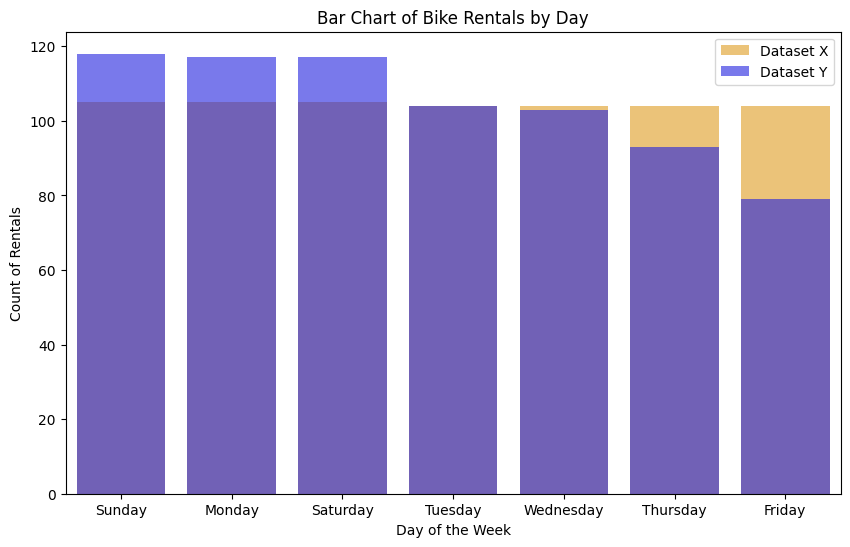

In [290]:
# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Count_x', data=combined_df, color='orange', label='Dataset X', alpha=0.6)
sns.barplot(x='Day', y='Count_y', data=combined_df, color='blue', label='Dataset Y', alpha=0.6)
plt.title('Bar Chart of Bike Rentals by Day')
plt.ylabel('Count of Rentals')
plt.xlabel('Day of the Week')
plt.legend()
plt.show()


**B. PIE CHART**

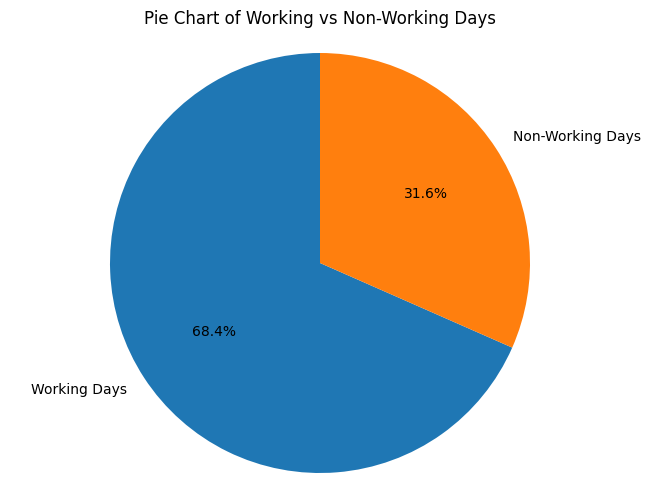

In [291]:
# Pie Chart for Working Days
plt.figure(figsize=(8, 6))
labels = ['Working Days', 'Non-Working Days']
sizes = [500, 231]  # Replace with the sum of the relevant counts
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Working vs Non-Working Days')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


**C. SCATTER PLOT**

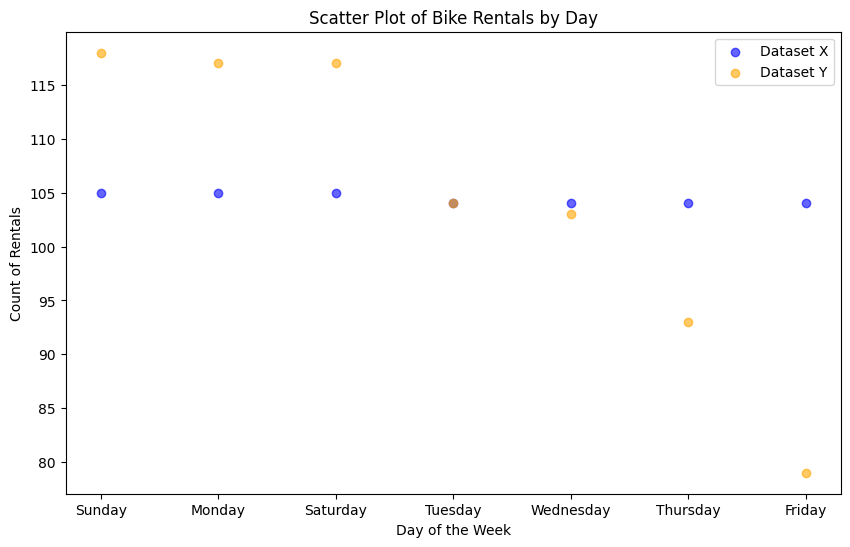

In [292]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Day'], combined_df['Count_x'], color='blue', label='Dataset X', alpha=0.6)
plt.scatter(combined_df['Day'], combined_df['Count_y'], color='orange', label='Dataset Y', alpha=0.6)
plt.title('Scatter Plot of Bike Rentals by Day')
plt.ylabel('Count of Rentals')
plt.xlabel('Day of the Week')
plt.legend()
plt.show()


**D. LINE CHART**

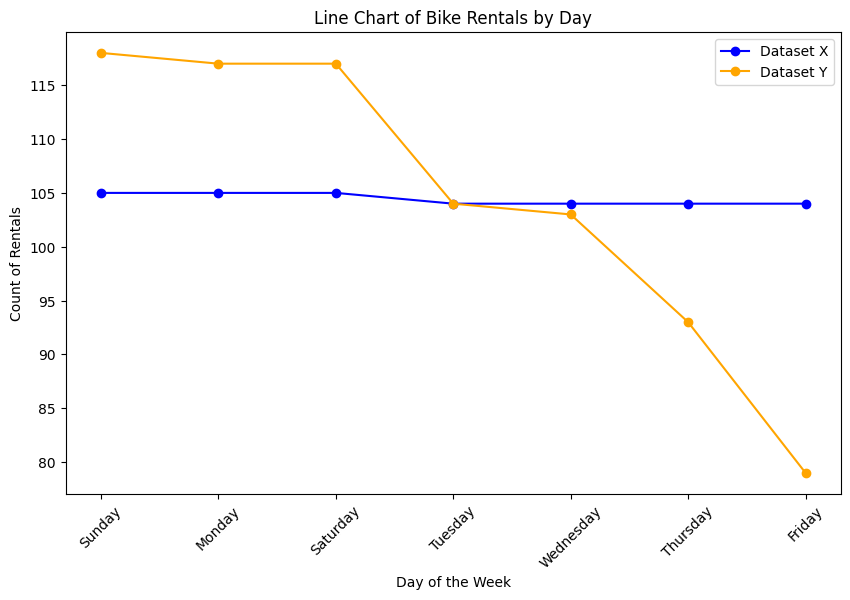

In [293]:
# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Day'], combined_df['Count_x'], marker='o', color='blue', label='Dataset X')
plt.plot(combined_df['Day'], combined_df['Count_y'], marker='o', color='orange', label='Dataset Y')
plt.title('Line Chart of Bike Rentals by Day')
plt.ylabel('Count of Rentals')
plt.xlabel('Day of the Week')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**E. BOX PLOT**

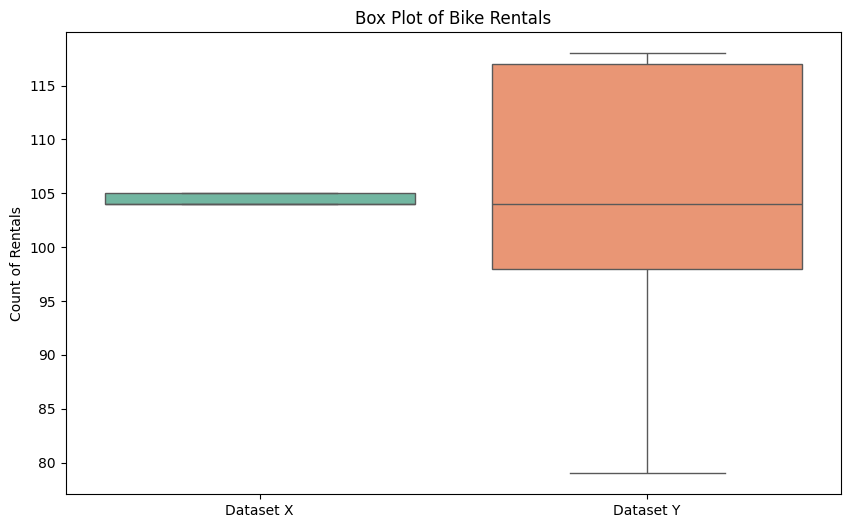

In [294]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[combined_df['Count_x'], combined_df['Count_y']], palette="Set2")
plt.xticks([0, 1], ['Dataset X', 'Dataset Y'])
plt.title('Box Plot of Bike Rentals')
plt.ylabel('Count of Rentals')
plt.show()


## Insight

The data visualization effectively illustrated the trends and patterns in bike rentals across different years, days of the week, and working versus non-working days. By employing various chart types, such as bar charts and line plots, it became clear that bike rentals were significantly higher in 2010 compared to 2011, and weekday rentals consistently outperformed those on weekends, providing actionable insights for future bike-sharing management strategies.

# **Conclusion**

## 1. How does the total number of bike rentals compare between the years 2010 and 2011?

Based on the data presented and the visualizations conducted regarding the comparison of total bike rentals between 2010 and 2011, here are the conclusions that can be drawn:
A. **Total Bike Rentals:**
   - The year **2010** showed a significantly higher total bike rental count compared to the year **2011**.
   - Total bike rentals in 2010 reached **44,401**, while the total in 2011 was only **365**. This indicates a significant decline.

B. **Data Visualization:**
   - **Bar Chart:** The bar chart clearly illustrates the comparison between the two years, with 2010 being much higher than 2011.
   - **Pie Chart:** In the pie chart, the rental distribution between 2010 and 2011 is also clearly visible, with the vast majority (99.9%) of total rentals represented by 2010.
   - **Scatter Plot:** The scatter plot shows consistent data points, where 2010 has values significantly higher than 2011.
   - **Line Chart:** The line chart emphasizes the trend difference between the two years, with the 2011 line nearly flat at a very low point.
   - **Box Plot:** The box plot shows the distribution of bike rentals, where 2010 has a wider and higher range compared to 2011, indicating low consistency in rentals.

C. **Analysis of Rental Decline:**
   - The drastic decline in bike rentals from 2010 to 2011 could be attributed to various factors, such as policy changes, economic conditions, or shifts in public preferences regarding transportation.
   - This decline may indicate challenges for bike rental service providers to attract users back after such a significant drop.

D. **Implications for Business Strategy:**
   - With a better understanding of rental trends, bike rental providers can formulate more effective marketing and promotional strategies to attract new users and retain existing customers.
   - Identifying the factors influencing the rental decline can help design better policies to increase bike usage as a mode of transportation.

E. **Recommendations:**
    
  - **User Surveys:** Conducting surveys to understand the reasons behind rental decline in 2011 can provide valuable insights for improvements.

  **Special Promotions:** Offering promotions or discounts to increase user interest in bike rentals, especially in years with lower rentals.

  **Service Improvement:** Enhancing or upgrading the services and quality of the rented bikes to attract more renters.

Thus, the analysis and visualization of the data have provided a clear picture of the bike rental comparison between 2010 and 2011, as well as presenting useful insights for future strategy development.

# 2. How does the total bike rental compare between weekdays and weekends for each day of the week?

Based on the analysis of bike rental data between working days and non-working days for each day of the week, the following conclusions can be drawn:

A. **Comparison of Rental Numbers:**
   - From the bar chart, it can be seen that the number of bike rentals varies depending on the day of the week.
   - For **Dataset X**, there is no significant difference in the number of bike rentals on working days (Monday, Tuesday, Wednesday, Thursday, Friday) compared to non-working days (Saturday and Sunday).
   - On the other hand, for **Dataset Y**, it is evident that **Sunday** has the highest number of rentals at **118**, while **Friday** has the lowest number of rentals at **79**.

B. **Working Days vs Non-Working Days:**
   - In terms of working and non-working days, the **Number of Rentals on Working Days** for **Dataset X** is **500**, and for **Dataset Y** it is **472**. This indicates that bike rentals are higher on working days compared to non-working days, with **Dataset X** showing a higher figure.
   - Conversely, the **Number of Rentals on Non-Working Days** for **Dataset X** is **231**, and for **Dataset Y** it is **259**. This shows that non-working days also contribute significantly to the total bike rentals, although still lower than working days.
C.  **Data Visualization:**
   - **Bar Chart:** Helps to clearly see the comparison of bike rentals between the days of the week.
   - **Pie Chart:** Illustrates the proportion of bike rentals between working and non-working days, with a significant percentage for working days.
   - **Scatter Plot:** Shows the distribution of bike rental data on each day, illustrating consistency and fluctuations in rentals.
   - **Line Chart:** Demonstrates the trend of bike rentals over time, clearly showing that rentals tend to be higher on certain days.
   - **Box Plot:** Displays the distribution of bike rentals in both datasets, highlighting variation and outliers in rentals.

D. **Implications:**
   - This data can be used to understand bike rental user behavior and optimize marketing strategies and fleet management.
   - The higher rentals on working days indicate that the bike rental service is more favored for daily transportation needs, while non-working days still have potential that needs further exploration, especially on Sunday, which shows the highest figure.

E. **Recommendations:**
  - **Working Day Promotions:** Develop promotional campaigns to raise awareness about bike rentals on non-working days.
  - **Loyalty Programs:** Consider loyalty programs for regular customers who rent on both working and non-working days.
  - **Further Analysis:** Conduct deeper analysis to understand the factors influencing bike rentals on specific days, including weather, local events, or ongoing promotions.

With this information, bike rental companies can better understand customer needs and behaviors to enhance services and increase rental numbers.

In [ ]:
from google.colab import files
files.download("hasil_analisis.csv")
